In [33]:
# Step 1: Load the Data

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 2: Load the data
df = pd.read_csv('cleaned_medical_data.csv')

# Step 3: Select relevant features, encode Gender, and drop missing values
data = df[['Gender', 'Age', 'Annual_income', 'Total_charge']].copy()
data = pd.get_dummies(data, columns=['Gender'], drop_first=False)

data = data.dropna()

# Step 4: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Confirm successful processing
print("Data preprocessing complete. Scaled data shape:", scaled_data.shape)

pd.DataFrame(scaled_data, columns=data.columns).head()

# Step 6: Convert scaled array back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Step 7: Save to CSV and print confirmation message
scaled_df.to_csv('cluster_medical_data.csv', index=False)

print("cluster_medical_data.csv saved successfully.")


Data preprocessing complete. Scaled data shape: (10000, 6)
cluster_medical_data.csv saved successfully.


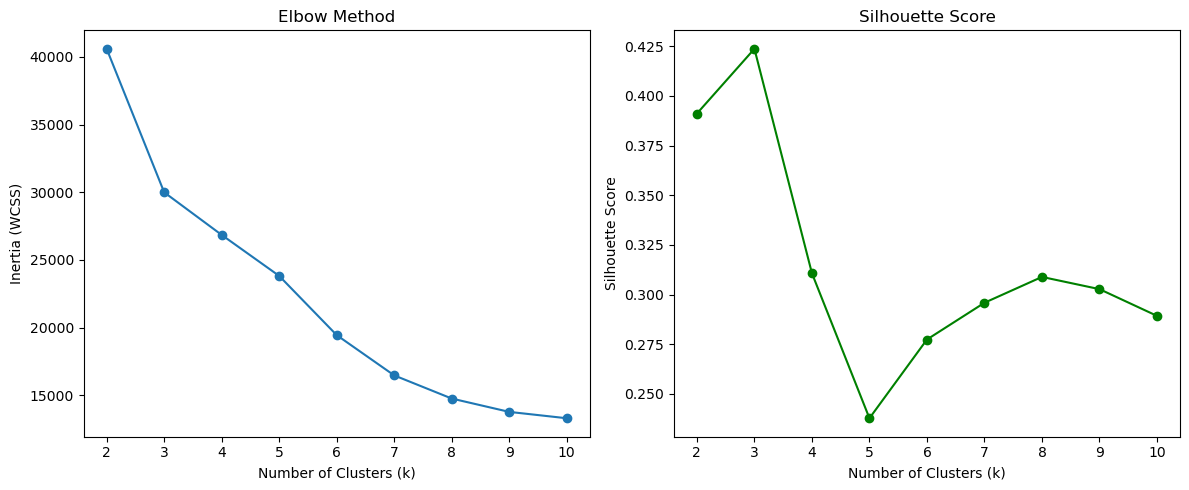

In [35]:
# Determine the optimal number of clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of k values to test
k_values = range(2, 11)

# Store results
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    inertia.append(kmeans.inertia_)  # WCSS for Elbow
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.cluster import KMeans
import pandas as pd

# Run K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original (pre-scaled) DataFrame
data['Cluster'] = clusters

# Save to CSV
data.to_csv('k-mean_analysis.csv', index=False)
print("Clustering complete. File saved as k-mean_analysis.csv\n")

# Display cluster analysis
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print("Cluster Analysis (mean values):")
print(cluster_summary)


Clustering complete. File saved as k-mean_analysis.csv

Cluster Analysis (mean values):
               Age  Annual_income  Total_charge  Gender_Female  Gender_Male  \
Cluster                                                                       
0        53.343563   40182.440219   5834.027603            1.0          0.0   
1        53.120176   40710.881109   5952.469576            0.0          1.0   
2        52.747664   42520.657944   5882.510935            0.0          0.0   

         Gender_Prefer not to answer  
Cluster                               
0                                0.0  
1                                0.0  
2                                1.0  
